In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('apple_quality.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [3]:
print("Shape of the Dataframe: ", df.shape)

print("First 5 rows:")
print(df.head())

print("Descriptive Statistics:")
print(df.describe())

print("Missing Values:")
print(df.isnull().sum())

Shape of the Dataframe:  (4000, 9)
First 5 rows:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  
Descriptive Statistics:
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.1498

In [4]:
df = df.drop(columns=[col for col in df.columns if "A_id" in col], axis=1)
quality_mapping = {"bad": 0, "good": 1}

df["Quality"] = df["Quality"].map(quality_mapping)

<Figure size 1000x1000 with 0 Axes>

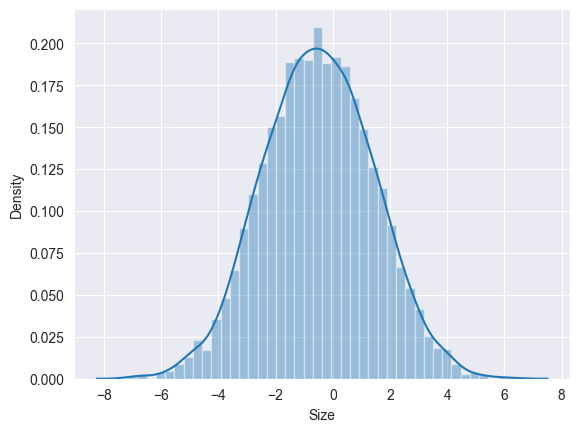

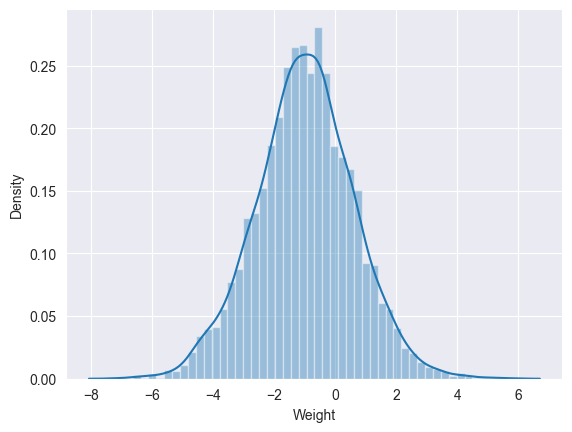

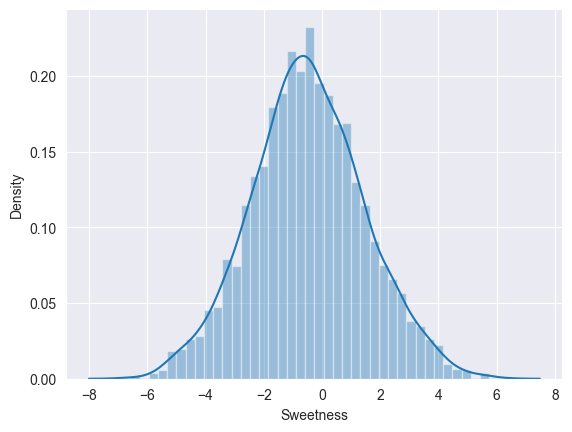

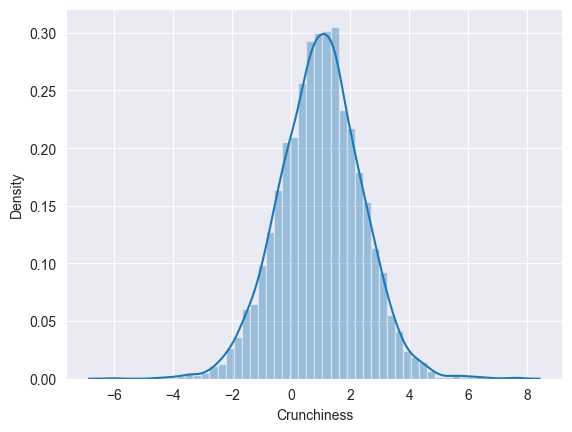

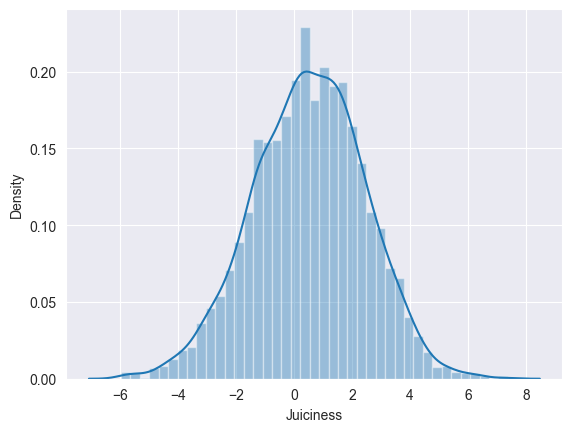

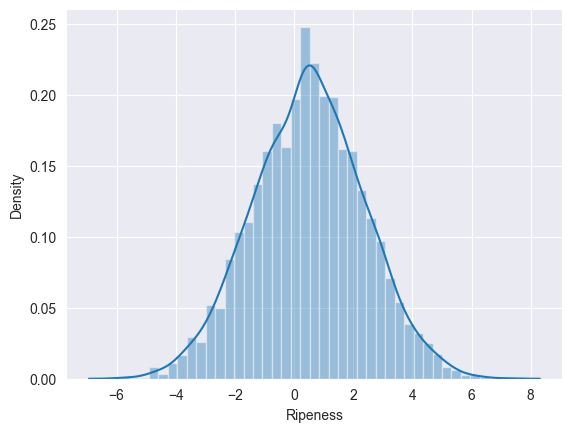

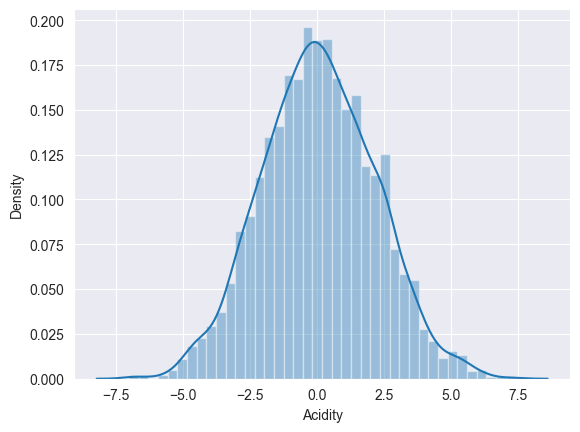

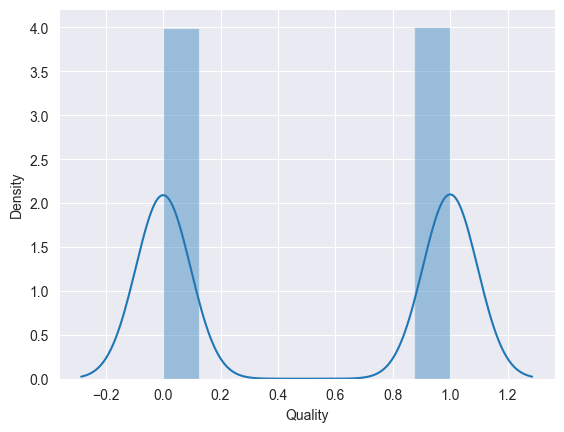

In [5]:

#feature_names=["Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity"]
 
features = df.columns

fig = plt.figure(figsize=(10, 10))

for feat in features: 
    plt.figure()
    sns.distplot(df[feat],label=feat) 

plt.show()


<Axes: >

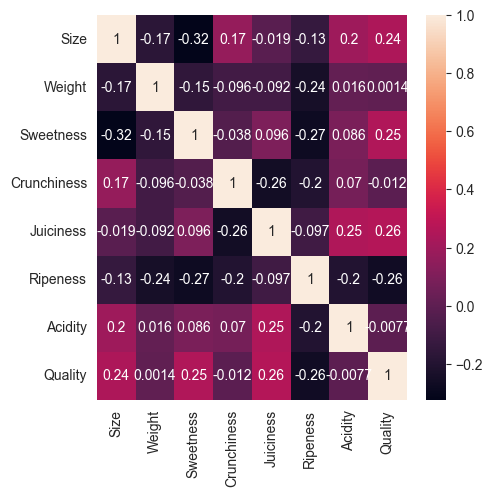

In [6]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

...

In [7]:
X= df.drop(columns = ['Quality'])
y = df['Quality']
column_names = df.columns
print(X.shape)
print(y.shape)

(4000, 7)
(4000,)


In [18]:
from sklearn.preprocessing import RobustScaler,StandardScaler
scaler = StandardScaler()
robust = RobustScaler()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_trainScaled = robust.fit_transform(X_train)
X_testScaled = robust.fit_transform(X_test)
X_train = scaler.fit_transform(X_trainScaled)
X_test = scaler.fit_transform(X_testScaled)

In [9]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [19]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2), 
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=40, validation_data=(X_test,Y_test),verbose=1, batch_size=64)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy:', test_accuracy)

Epoch 1/40
57/57 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.7894 - val_loss: 0.3335 - val_accuracy: 0.8500
Epoch 2/40
57/57 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8542 - val_loss: 0.2989 - val_accuracy: 0.8700
Epoch 3/40
57/57 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8733 - val_loss: 0.2678 - val_accuracy: 0.8875
Epoch 4/40
57/57 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.8839 - val_loss: 0.2427 - val_accuracy: 0.8925
Epoch 5/40
57/57 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8972 - val_loss: 0.2668 - val_accuracy: 0.9000
Epoch 6/40
57/57 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.8969 - val_loss: 0.2428 - val_accuracy: 0.9100
Epoch 7/40
57/57 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.9025 - val_loss: 0.2529 - val_accuracy: 0.9050
Epoch 8/40
57/57 [==

In [13]:
import optunity
import optunity.metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


def optimize_model(learning_rate, num_hidden_layers, epochs, batch_size):
    
    if batch_size<1:
        batch = 32
    elif batch_size<2:
        batch = 64
    else:
        batch = 128
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(int(num_hidden_layers)):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

   
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

   
    model.fit(X_train, Y_train, epochs=int(epochs), batch_size=int(batch), validation_split=0.1, verbose=0)

    
    validation_loss = model.evaluate(X_test, Y_test, verbose=0)
    
    return validation_loss  

search_space = {'learning_rate': [0.001, 0.1],
                'num_hidden_layers': [1, 3],
                'epochs': [30, 100],
                'batch_size': [0, 3]}

optimal_params, info, _ = optunity.minimize(optimize_model, solver_name='particle swarm', num_evals=20, **search_space, )

print("Optimal Hyperparameters:")
print(optimal_params)
print(info.optimum)


Optimal Hyperparameters:
{'learning_rate': 0.00501220703125, 'num_hidden_layers': 1.5185546875, 'epochs': 46.5771484375, 'batch_size': 2.97216796875}
[0.1651335507631302, 0.9449999928474426]


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid = {
    'learning_rate_init': [0.001, 0.01, 0.1],
    'hidden_layer_sizes': [(64,), (64, 64), (128,), (128, 128),(32,64),(64,32),(128,64)],
    'max_iter': [30, 50, 75,100],
    'batch_size': [32, 64, 128]
}

mlp = MLPClassifier()

grid_search = GridSearchCV(mlp, param_grid, cv=7, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_
val_accuracy_grid = accuracy_score(Y_test, best_model_grid.predict(X_test))

print("Best Parameters (Grid Search):", best_params_grid)
print("Validation Accuracy (Grid Search):", val_accuracy_grid)

random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=30, cv=7, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, Y_train)

best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_
val_accuracy_random = accuracy_score(Y_test, best_model_random.predict(X_test))

print("Best Parameters (Random Search):", best_params_random)
print("Validation Accuracy (Random Search):", val_accuracy_random)


Fitting 7 folds for each of 252 candidates, totalling 1764 fits
Best Parameters (Grid Search): {'batch_size': 32, 'hidden_layer_sizes': (128, 128), 'learning_rate_init': 0.001, 'max_iter': 100}
Validation Accuracy (Grid Search): 0.945
Fitting 7 folds for each of 30 candidates, totalling 210 fits
Best Parameters (Random Search): {'max_iter': 30, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (128, 128), 'batch_size': 64}
Validation Accuracy (Random Search): 0.9525


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'learning_rate_init': Continuous(0.001, 0.1, distribution='log-uniform'),
    'hidden_layer_sizes': Categorical([(64,), (64, 64), (128,), (128, 128), (32,64), (64,32), (128,64)]),
    'max_iter': Integer(30, 80),
    'batch_size': Categorical([32, 64, 128])
}

mlp = MLPClassifier()

ga_search = GASearchCV(estimator=mlp,
                       scoring='accuracy',
                       param_grid=param_grid,
                       cv=StratifiedKFold(n_splits=5, shuffle=True),
                       population_size=15,
                       generations=15,
                       tournament_size=4,
                       elitism=True,
                       crossover_probability=0.8,
                       mutation_probability=0.2,
                       n_jobs=-1,
                       verbose=True)

ga_search.fit(X_train, Y_train)

best_params = ga_search.best_params_
best_model = ga_search.best_estimator_
val_accuracy = accuracy_score(Y_test, best_model.predict(X_test))

print("Best Parameters (Genetic Algorithm):", best_params)
print("Validation Accuracy (Genetic Algorithm):", val_accuracy)


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.935167	0.00744652 	0.945      	0.914444   
1  	30    	0.940796	0.00428519 	0.948611   	0.933056   
2  	30    	0.942241	0.00326389 	0.948611   	0.935      
3  	30    	0.9435  	0.00312102 	0.948611   	0.939167   
4  	30    	0.944685	0.00314084 	0.948611   	0.939722   
5  	30    	0.94613 	0.00249787 	0.948611   	0.941111   
6  	30    	0.946556	0.00244234 	0.948611   	0.941111   
7  	30    	0.946037	0.00248342 	0.948611   	0.941111   
8  	30    	0.94513 	0.00353825 	0.948611   	0.939444   
9  	30    	0.946704	0.00264471 	0.948611   	0.939444   
10 	30    	0.946407	0.00320183 	0.948611   	0.938611   
11 	30    	0.945019	0.00365496 	0.948611   	0.939167   
12 	30    	0.945519	0.00262127 	0.948611   	0.939167   
13 	30    	0.944389	0.0036896  	0.948611   	0.936944   
14 	30    	0.945407	0.00270053 	0.948611   	0.940278   
15 	30    	0.946574	0.00287186 	0.948611   	0.939444   
Best Parameters (Genetic Algorithm): {'learning_

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV
from skopt import Optimizer
from skopt.space import Real, Categorical, Integer

param_space = {
    'learning_rate_init': Real(0.001, 0.1, prior='log-uniform'),
    'hidden_layer_sizes': Integer(10, 400),
    'max_iter': Integer(30, 100),
    'batch_size': Categorical([32, 64, 128])
}

mlp = MLPClassifier()

bayes_search = BayesSearchCV(estimator=mlp,
                             search_spaces=param_space,
                             cv=5,
                             n_iter=50,
                             n_jobs=-1,
                             verbose=1,
                             random_state=42)

bayes_search.fit(X_train, Y_train)

best_params = bayes_search.best_params_
best_model = bayes_search.best_estimator_
val_accuracy = accuracy_score(Y_test, best_model.predict(X_test))

print("Best Parameters (Bayesian Optimization):", best_params)
print("Validation Accuracy (Bayesian Optimization):", val_accuracy)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi